In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

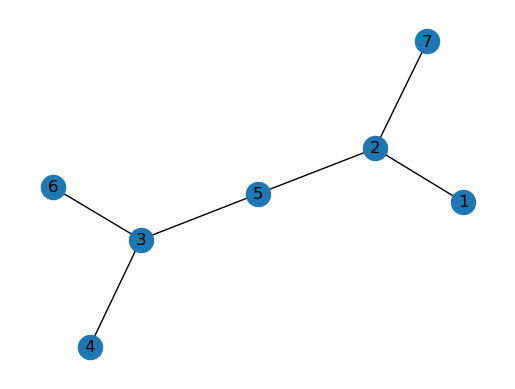

In [2]:
edges = edges = [(1, 2), (3, 4), (3, 5), (2, 7), (3, 6), (2, 5)] # [(1, 2), (2, 3), (2, 3), (3, 4), (3, 5), (2, 7)]
g = nx.Graph(edges)
subax1 = plt.subplot(111)
nx.draw(g, with_labels=True)

In [3]:
edges = [e for e in g.edges]
print(edges, edges[0], g.edges(edges[0]), g.edges[(1,2)], g.edges[1,2], g[1][2], g.edges[edges[0]])
x = [g.edges[e] for e in edges]
print(x)

[(1, 2), (2, 7), (2, 5), (3, 4), (3, 5), (3, 6)] (1, 2) [(1, 2), (2, 7), (2, 5)] {} {} {} {}
[{}, {}, {}, {}, {}, {}]


In [4]:
print(g.nodes)     # g.nodes[0] does NOT work
nodes = [n for n in g.nodes]
print(nodes, nodes[0])

[1, 2, 3, 4, 5, 7, 6]
[1, 2, 3, 4, 5, 7, 6] 1


In [5]:
nodes = [v for v in g.nodes]
nNodes = len(nodes)

# While an edge in this un-directled graph has two representations (u, v) and (v, u), 
# an edge in the below list has a unique representation !!!, gifting us a natural orientation of edge: from smaller node to larger node.
edges = [e for e in g.edges]
nEdges = len(edges)
    
print(nodes)
print(edges)

[1, 2, 3, 4, 5, 7, 6]
[(1, 2), (2, 7), (2, 5), (3, 4), (3, 5), (3, 6)]


In [6]:
edges_signs = []
for v in nodes:
    edges_v = [(v, u) for u in nodes if (v, u) in g.edges]
    edges_v_plus = [(v, u) for (v, u) in edges_v if v > u]
    edges_v_minus = [(v, u) for (v, u) in edges_v if (v, u) not in edges_v_plus]
    print(v, edges_v_plus, edges_v_minus)
    edges_v_plus = [(edges.index((u, v)) if edges.count((u, v)) > 0 else edges.index((v, u))) for (u, v) in edges_v_plus]
    edges_v_minus = [(edges.index((u, v)) if edges.count((u, v)) > 0 else edges.index((v, u))) for (u, v) in edges_v_minus]
    print(v, edges_v_plus, edges_v_minus)
    edges_signs.append((edges_v_plus, edges_v_minus))

1 [] [(1, 2)]
1 [] [0]
2 [(2, 1)] [(2, 5), (2, 7)]
2 [0] [2, 1]
3 [] [(3, 4), (3, 5), (3, 6)]
3 [] [3, 4, 5]
4 [(4, 3)] []
4 [3] []
5 [(5, 2), (5, 3)] []
5 [2, 4] []
7 [(7, 2)] []
7 [1] []
6 [(6, 3)] []
6 [5] []


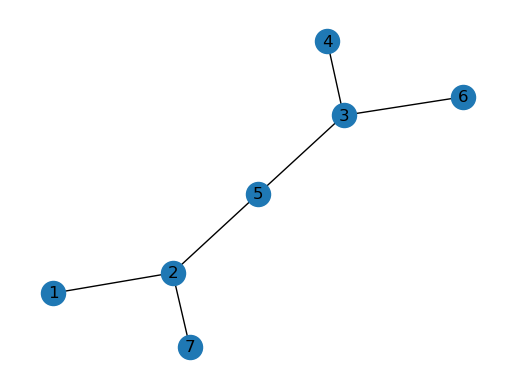

In [7]:
subax1 = plt.subplot(111)
nx.draw(g, with_labels=True)

In [8]:
print(g.edges(1, 2) == g.edges(2, 1))
print(g.edges(1,2), g.edges(2,1))
print([e for e in g.edges])


False
[(1, 2, None)] [(2, 1, None), (2, 7, None), (2, 5, None)]
[(1, 2), (2, 7), (2, 5), (3, 4), (3, 5), (3, 6)]


In [9]:
print(edges_signs)


[([], [0]), ([0], [2, 1]), ([], [3, 4, 5]), ([3], []), ([2, 4], []), ([1], []), ([5], [])]


In [10]:
matrix_B = [ [ (1 if e in edges_signs[v][1] else -1 if e in edges_signs[v][0] else 0) for e in range(len(edges)) ] for v in range(len(nodes))]
matrix_B = np.array(matrix_B, dtype=np.float32)
print(matrix_B)

[[ 1.  0.  0.  0.  0.  0.]
 [-1.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.]
 [ 0.  0.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.]
 [ 0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.]]


In [11]:
vector_C = np.array( [1.0 for _ in range(nEdges)], dtype=np.float32)
matrix_C = np.diag(vector_C)
print(matrix_C)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [12]:
matrix_L = np.dot(np.dot(matrix_B, matrix_C), matrix_B.T)
print(matrix_L)

[[ 1. -1.  0.  0.  0.  0.  0.]
 [-1.  3.  0.  0. -1. -1.  0.]
 [ 0.  0.  3. -1. -1.  0. -1.]
 [ 0.  0. -1.  1.  0.  0.  0.]
 [ 0. -1. -1.  0.  2.  0.  0.]
 [ 0. -1.  0.  0.  0.  1.  0.]
 [ 0.  0. -1.  0.  0.  0.  1.]]


In [13]:
inverse_L = np.linalg.pinv(matrix_L)    # Moore-Penrose pseudo-inverse
print(inverse_L)

[[ 1.3061225   0.44897965 -0.55102044 -0.69387764 -0.12244897  0.3061225
  -0.69387764]
 [ 0.44897965  0.5918368  -0.4081633  -0.55102044  0.02040817  0.44897965
  -0.55102044]
 [-0.55102044 -0.4081633   0.5918368   0.44897965  0.02040817 -0.55102044
   0.44897965]
 [-0.69387764 -0.55102044  0.44897965  1.3061224  -0.12244897 -0.69387764
   0.3061225 ]
 [-0.12244898  0.02040817  0.02040817 -0.12244898  0.44897962 -0.12244898
  -0.12244898]
 [ 0.3061225   0.44897965 -0.55102044 -0.69387764 -0.12244897  1.3061225
  -0.69387764]
 [-0.69387764 -0.55102044  0.44897965  0.3061225  -0.12244898 -0.69387764
   1.3061224 ]]


In [14]:
source_node = nodes.index(1)
target_node = nodes.index(7)
X_vector = np.zeros((len(nodes),), dtype=np.float32)
X_vector[source_node] = 1.0
X_vector[target_node] = -1.0

In [15]:
flow = np.dot(matrix_C, matrix_B.T)
flow = np.dot(flow, inverse_L)
flow = np.dot(flow, X_vector)
print(flow)
print(edges)

[1. 1. 0. 0. 0. 0.]
[(1, 2), (2, 7), (2, 5), (3, 4), (3, 5), (3, 6)]


In [16]:
def find_Electric_Flow_On_Connected_Graph(graph, source, target):
        edges = [e for e in graph.edges]
        nEdges = len(edges)
        nodes = [v for v in graph.nodes]
        edges_signs = []
        for v in nodes:
                edges_v = [(v, u) for u in nodes if (v, u) in graph.edges]
                edges_v_plus = [(v, u) for (v, u) in edges_v if v > u]
                edges_v_minus = [(v, u) for (v, u) in edges_v if (v, u) not in edges_v_plus]
                edges_v_plus = [(edges.index((u, v)) if edges.count((u, v)) > 0 else edges.index((v, u))) for (u, v) in edges_v_plus]
                edges_v_minus = [(edges.index((u, v)) if edges.count((u, v)) > 0 else edges.index((v, u))) for (u, v) in edges_v_minus]
                edges_signs.append((edges_v_plus, edges_v_minus))

        matrix_B = [ [ (1 if e in edges_signs[v][1] else -1 if e in edges_signs[v][0] else 0) for e in range(len(edges)) ] for v in range(len(nodes))]
        matrix_B = np.array(matrix_B, dtype=np.float32)
        vector_C = np.array( [1.0 for _ in range(nEdges)], dtype=np.float32)
        matrix_C = np.diag(vector_C)
        matrix_L = np.dot(np.dot(matrix_B, matrix_C), matrix_B.T)
        inverse_L = np.linalg.pinv(matrix_L)    # Moore-Penrose pseudo-inverse
        source_node = nodes.index(source)
        target_node = nodes.index(target)
        X_vector = np.zeros((len(nodes),), dtype=np.float32)
        X_vector[source_node] = 1.0
        X_vector[target_node] = -1.0
        flow = np.dot(matrix_C, matrix_B.T)
        flow = np.dot(flow, inverse_L)
        flow = np.dot(flow, X_vector)

        return flow, nodes, edges   # nodes and edges, just in case list(graph.nodes) might have different order each time.

[-1.4901161e-08  1.0000001e+00 -1.0000001e+00 -4.4703484e-08
  2.9802322e-08 -4.4703484e-08]
[(1, 2), (2, 7), (2, 5), (3, 4), (3, 5), (3, 6)]


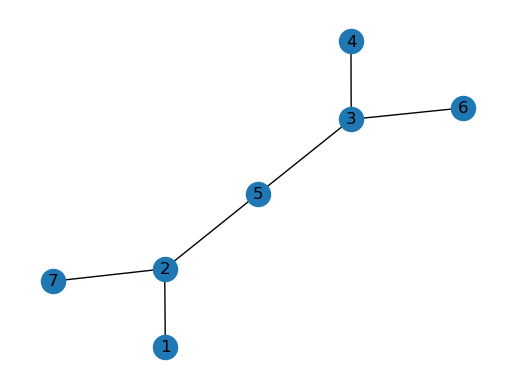

In [17]:
flow, nodes, edges = find_Electric_Flow_On_Connected_Graph(g, 5, 7)
print(flow)
print(edges)
subax1 = plt.subplot(111)
nx.draw(g, with_labels=True)

{'conductance': 1.0}
{'conductance': 1.0}


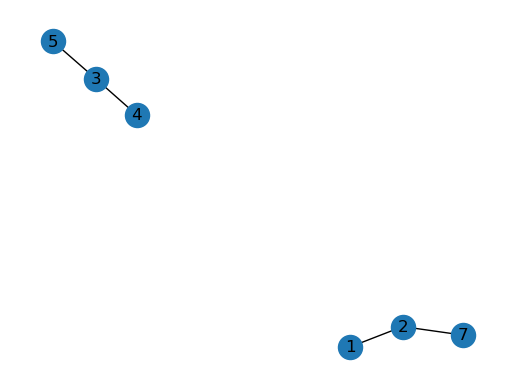

In [18]:
edges = [(1, 2), (3, 4), (3, 5), (2, 7)]
graph = nx.Graph(edges)

graph.edges[(1, 2)]['conductance'] = 1.0
# graph.edges[(2, 3)]['conductance'] = 1.0
graph.edges[(3, 4)]['conductance'] = 1.0
graph.edges[(3, 5)]['conductance'] = 1.0
graph.edges[(2, 7)]['conductance'] = 1.0

print(graph.edges[edges[0]])
print(graph[edges[0][0]][edges[0][1]])

subax1 = plt.subplot(111)
nx.draw(graph, with_labels=True)

In [19]:
flow, nodes, edges = find_Electric_Flow_On_Connected_Graph(graph, 1, 5)
print(flow)
print(edges)

[ 0.6666666  0.3333333 -0.3333333  0.6666666]
[(1, 2), (2, 7), (3, 4), (3, 5)]


{'conductance': 1}
{'conductance': 1}


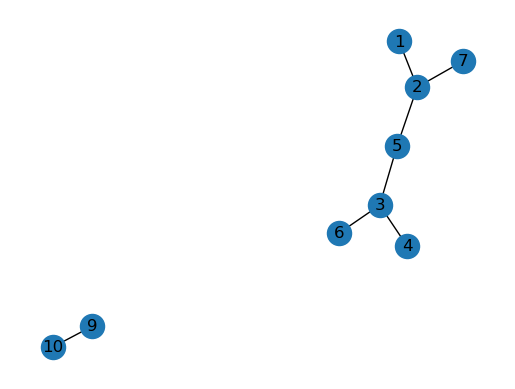

In [28]:
edges = [(1, 2), (3, 4), (3, 5), (2, 7), (3, 6), (2, 5), (9, 10)]
cond =  [ 1,      1,      0,      1,      1,       1,     1]
graph = nx.Graph(edges)

for i in range(len(edges)):
    graph.edges[edges[i]]['conductance'] = cond[i]

print(graph.edges[edges[0]])
print(graph[edges[0][0]][edges[0][1]])

subax1 = plt.subplot(111)
nx.draw(graph, with_labels=True)

In [21]:
flow, nodes, edges = find_Electric_Flow_On_Connected_Graph(graph, 1, 6)
print(flow)
print(edges)
eId = (edges.index((2, 5)) if edges.count((2, 5)) > 0 else edges.index((5, 2)))
print(eId)

[ 1.0000001e+00 -5.9604645e-08  1.0000001e+00  5.9604645e-08
 -1.0000001e+00  1.0000000e+00]
[(1, 2), (2, 7), (2, 5), (3, 4), (3, 5), (3, 6)]
2


In [29]:
nx.shortest_path_length(graph, 6, 7)

TypeError: all_pairs_shortest_path_length() takes from 1 to 2 positional arguments but 3 were given

In [26]:
nodes = [n for n in graph.nodes]
for i in nodes:
    for j in nodes:
        if(nx.shortest_path_length(graph, i, j) <= 40000):
            print(i, j, 'Yes')

1 1 Yes
1 2 Yes
1 3 Yes
1 4 Yes
1 5 Yes
1 7 Yes
1 6 Yes
2 1 Yes
2 2 Yes
2 3 Yes
2 4 Yes
2 5 Yes
2 7 Yes
2 6 Yes
3 1 Yes
3 2 Yes
3 3 Yes
3 4 Yes
3 5 Yes
3 7 Yes
3 6 Yes
4 1 Yes
4 2 Yes
4 3 Yes
4 4 Yes
4 5 Yes
4 7 Yes
4 6 Yes
5 1 Yes
5 2 Yes
5 3 Yes
5 4 Yes
5 5 Yes
5 7 Yes
5 6 Yes
7 1 Yes
7 2 Yes
7 3 Yes
7 4 Yes
7 5 Yes
7 7 Yes
7 6 Yes
6 1 Yes
6 2 Yes
6 3 Yes
6 4 Yes
6 5 Yes
6 7 Yes
6 6 Yes
